In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/New

/content/drive/MyDrive/Colab Notebooks/Deep Learning/New


### 군집 데이터 불러오기

In [159]:
import pickle
import pandas as pd

In [160]:
with open("./data/new/cluster_model.pkl", "rb") as f:
  df = pickle.load(f)

In [161]:
df['cluster'].value_counts()

,count
cluster,
1,3066
0,1352


In [254]:
# df = df[df['cluster'] != 2]
# display(df)

# LDA 토픽 모델링 (Latent Dirichlet Allocation)
- 토픽 모델링 : 코퍼스(말뭉치)로부터 어떠한 토픽(주제)가 존재하는 지를 파악하기 위한 알고리즘
- 잠재 디레클레 할당(LDA) : 대표적인 토픽 모델링의 알고리즘
 - 코퍼스(말뭉치)에 대해서 각 문서들이 어떤 토픽(주제)를 가지고 있는 지에 대한 확률 모형


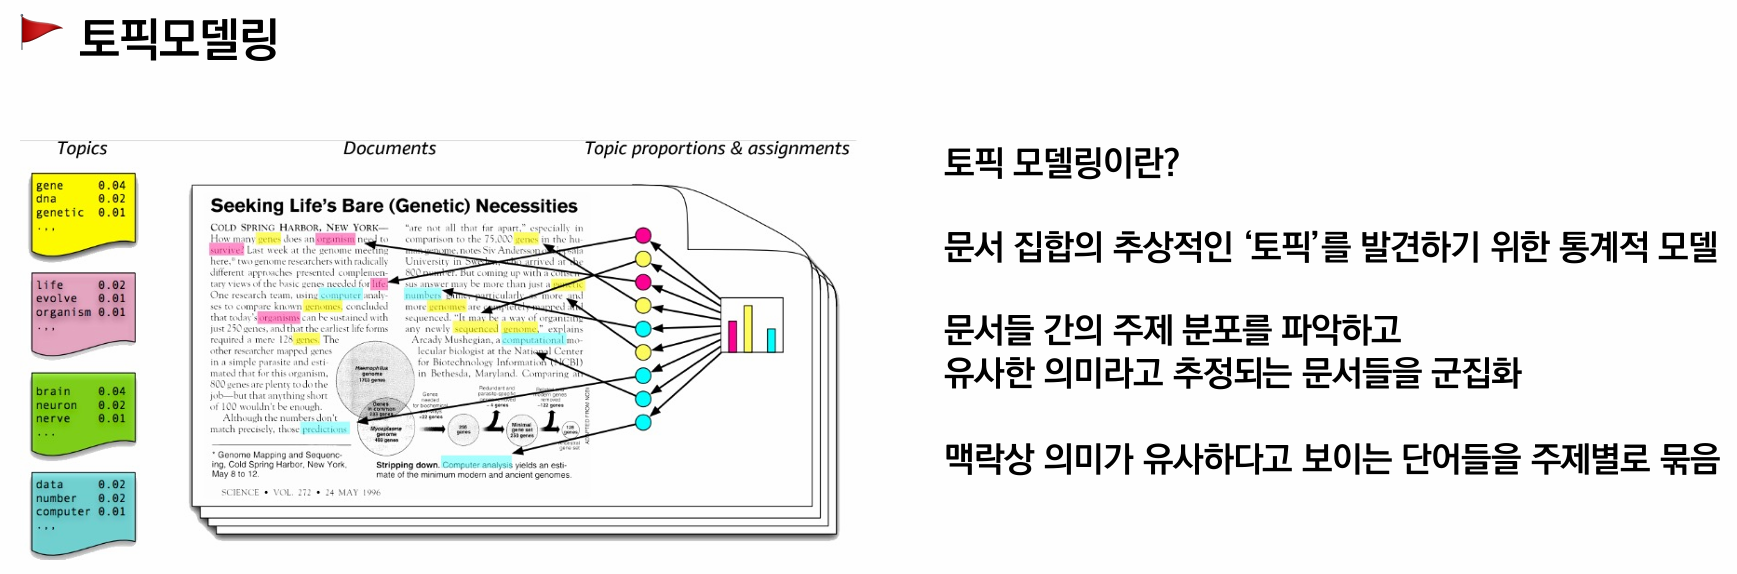

### LDA 프로세스
1. 토픽 개수 k수 설정 : 분석가가 LDA에 미리 토픽  개수(k수)지정
2. 초기 토픽 할당
  - 모든 문서(리뷰)의 각 단어에 대해서, k개의 토픽 중 "랜덤"으로 할당
3. 토픽 재할당 반복 - 잘 못 할당된 단어들을 올바른 토픽으로 재분류 하기 위함

**토픽 재할당 예시**  
- **상황:** 두 개의 문서(`doc1`, `doc2`)가 있고, `doc1`의 세 번째 단어 "apple"의 토픽을 결정하고자 함

  - **(a) 초기 상황:**  
    - "apple"은 아직 초기 랜덤 할당 상태  
<center>
<img src="https://wikidocs.net/images/page/30708/lda1.PNG" width="50%" alt="초기 할당 예시">
</center>

  - **(b) 첫 번째 기준 (문서 내 단어 분포):**  
    - `doc1`의 모든 단어가 토픽 A와 토픽 B에 5:5 비율로 할당되어 있다면, "apple"은 두 토픽 모두에 속할 가능성이 있음  
<center>
<img src="https://wikidocs.net/images/page/30708/lda3.PNG" width="50%" alt="문서 내 단어 분포">
</center>

  - **(c) 두 번째 기준 (전체 문서 단어 분포):**  
    - 전체 문서에서 "apple"의 분포를 보면 토픽 B에 더 많이 할당되어 있음  
<center>
<img src="https://wikidocs.net/images/page/30708/lda2.PNG" width="50%" alt="전체 문서 단어 분포">
</center>

- **최종 결정:**  
  - 두 기준을 종합해 LDA는 `doc1`의 "apple"을 **토픽 B**에 할당

# 1. LDA를 위한 데이터 전처리

- 점수 인코딩(수치화)과 단어 사전 생성
- 단어들에 고유 ID값을 부여 후 ,BOW표현

In [205]:
cluster = 1

df_cluster0 = df[df["cluster"]==cluster]
display(df_cluster0.head())
print(len(df_cluster0))

,review,review_clean,tagged_review,vector,cluster
0,잘받았습니다^^ 아직사용전입니다^^ 잘사용하겠습니다^^,잘받았습니다 아직사용전입니다 잘사용하겠습니다,"[받다, 사용, 전입, 니, 자다, 용하다]","[-0.0055209068, -0.0052084085, -0.0091379145, 0.0019833804, 0.0036693327, 0.0006405299, -0.0063550533, 0.0037456723, -0.007470662, 0.0035232212, 0.0028710952, 0.0028136584, -0.007504592, -3.0470765e-05, -0.0067545543, -0.0062474175, 0.0048956526, 0.0047655944, -0.0059480844, 0.0014911002, -0.0051351325, -0.0011399186, -0.0017618722, 0.0040242556, 0.007610577, -0.005083022, -0.009887145, -0.009272659, 0.0018657774, -0.0103426855, 0.00356056, 0.003863314, -0.007848424, -0.004542566, -0.0034833718, 0.004076824, 0.002653734, -0.007384264, -0.000509818, -0.0019919921, -0.0012529291, -0.0040270793, 0.00062291557, -0.008193839, 0.0029348664, -0.0036439248, 0.00024863085, -0.0033625048, 0.0062096594, -0.0016441164, -0.0018034127, 0.0012783069, -0.0022450548, -0.0045144665, -0.0020750272, 0.009575386, -0.0018930034, 0.004233326, -0.0051184236, 0.004668421, 0.0022465847, 0.00048769813, 0.0011289055, -0.00053117675, 0.0040743584, -0.0051862895, 0.00095169846, -0.004071947, -0.007935112, -0.007226905, -0.0030270969, 0.0011061857, -0.0031075317, -0.012020998, -0.003362172, 0.0026859588, -0.007499252, -0.0069045615, -0.001717298, 0.0038987058, 0.0040540732, 0.0020860357, -0.009479418, 0.011162924, 0.0032429863, 0.0038519106, 0.0030884543, -0.0038246906, 0.011531076, -0.0021490944, -0.00059719506, 0.0025455246, -0.005636057, -0.0059211245, -0.00024410726, 0.0069025974, 0.0064652413, -0.001531696, 0.003761314, 0.0071152016, ...]",1
1,조리기능사 실기용 칼 추천 좀 부탁드립니당,조리기능사 실기용 칼 추천 좀 부탁드립니당,"[조리, 기능사, 실기, 용, 칼, 추천, 부탁드리다]","[-0.0011774885, 0.006426755, 0.005904674, -0.004354714, -0.0023717051, 0.0047574495, 0.0007209995, 0.0028704691, -0.0029844914, -0.003160974, 0.00499612, 0.0033042943, 0.0080899615, -0.002815445, 0.003802945, -0.0049319686, -0.0060985987, -0.004223328, -0.00494794, -0.002629063, 0.0033477494, -0.00030091542, 0.0012812281, 0.0014157733, 0.0031990542, 0.0020668826, 0.0067336517, -0.0018645251, -0.0031221875, 0.0021861817, 0.0042221555, 0.003364166, -0.004355348, -0.0018211803, -0.004455848, 0.004567955, -0.0035878955, 9.2952236e-05, 0.005048439, 0.0015775643, -0.004658026, 0.0034880138, 0.0037068576, 0.0063877585, -0.0030908345, 0.003174601, 0.0030523834, -0.0024967054, 0.00036848604, 0.0011571642, -0.005711518, -0.0074244924, 0.004946645, -0.0027125461, 0.0060168556, -0.0026286757, 0.0057023163, -0.0050343936, 0.0026071859, 0.003039146, -0.005560894, 0.005887154, -0.003497435, -0.0023635402, 0.0025160026, 0.007401989, -0.00080311747, -4.4789056e-05, 0.0029381427, 0.0013782706, -0.0070885243, -0.0060703065, 0.0021463144, 0.0068800882, -0.004520075, 0.0022574577, 0.0007658584, 0.0033596419, -0.0028701501, 0.0005921834, -0.0024529838, -0.003611117, 0.007199567, -0.009975497, -0.0008699793, 0.0017147039, -0.005791313, -0.0031690015, -0.0028691157, -0.0026134418, 0.0040575843, 0.006487601, 0.004993322, 0.001114396, -0.0056579523, -0.0009673183, -0.002574338, 0.004607888, -0.004436846, -0.0073550707, ...]",1
3,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,"[음식, 눌, 붙다, 프라이팬, 세척, 요, 프라이팬, 고기, 굽다, 먹다, 고기, 프라이팬, 바닥, 눌, 붙다, 떨다, 지다, 프라이팬, 코팅, 벗겨지다, 자다, 세척]","[0.0045391517, -0.00994261, 0.0013012845, 0.00811231, 0.0051621567, -0.0014306125, 0.0069632865, -0.016211135, 0.0002275387, 0.009001447, 0.0021690386, -0.007860007, 0.009087365, 0.00044765932, 0.015254463, 0.00938799, -0.002618164, -0.001652726, 0.005648012, -0.0035392186, 0.0052997624, -0.009123612, -0.0053371326, -0.010420847, -0.013749851, 0.0027954385, 0.01143201, -0.0057620206, 0.0054405583, 0.0027454465, 0.0013467532, 0.010362932, 0.00026151043, -0.008976446, 0.010571992, -0.01334982, -0.0061382814, 0.0024256834, -0.008105383, 0.015209155, -0.0024365946, -0.008723814, 0.007314045, 0

3066


- 정수 인코딩, 단어사전 생성

In [206]:
from gensim.corpora import Dictionary # 문서(리뷰)들에 단어들을 정수 ID 값으로 매핑하는데 사용

In [207]:
all_documents =list(df_cluster0["tagged_review"])

In [208]:
word_dict = Dictionary(all_documents) # 고유 정수 ID값을 매핑한 단어사전 객체

In [209]:
# 생성한 단어사전 확ㅇ니
print(word_dict.token2id)

{'니': 0, '받다': 1, '사용': 2, '용하다': 3, '자다': 4, '전입': 5, '기능사': 6, '부탁드리다': 7, '실기': 8, '용': 9, '조리': 10, '추천': 11, '칼': 12, '고기': 13, '굽다': 14, '눌': 15, '떨다': 16, '먹다': 17, '바닥': 18, '벗겨지다': 19, '붙다': 20, '세척': 21, '요': 22, '음식': 23, '지다': 24, '코팅': 25, '프라이팬': 26, '감자전': 27, '구매': 28, '그렇다': 29, '기르다': 30, '기름': 31, '누르다': 32, '늘다': 33, '도와주다': 34, '두르다': 35, '땡기다': 36, '맛': 37, '버리다': 38, '보다': 39, '부침개': 40, '비': 41, '새롭다': 42, '싶다': 43, '써다': 44, '안좋다': 45, '않다': 46, '오다': 47, '요즘': 48, '일상': 49, '잇다': 50, '자꾸': 51, '자주': 52, '장마철': 53, '장만': 54, '적당하다': 55, '전': 56, '좋다': 57, '주말': 58, '해도': 59, '해먹': 60, '해보다': 61, '베다': 62, '베이': 63, '아프다': 64, '엄마': 65, '원래': 66, '피': 67, '비싸다': 68, '사다': 69, '없다': 70, '주다': 71, '집게': 72, '힘': 73, '가요': 74, '개': 75, '고체': 76, '구리': 77, '귀찮다': 78, '그거': 79, '나오다': 80, '노란색': 81, '닦다': 82, '데우다': 83, '료': 84, '빼다': 85, '생으로': 86, '스팸': 87, '전자레인지': 88, '집': 89, '궁금하다': 90, '더': 91, '삼성': 92, '쓸다': 93, '아예': 94, '인덕션': 95, '종류': 96, '트': 97, '플레이':

In [210]:
len(word_dict)

5431

각 단어가 문서 내에서 몇 개 있는지 빈도 확인

In [211]:
pd.set_option('display.max_colwidth', None)

df_cluster0["review"][df_cluster0['review'].str.contains('언어', na=False)]

,review


In [212]:
print(word_dict.doc2bow(all_documents[0]))
# 해당 문서(리뷰)에서 BOW 형식으로 변환해서 (단어 ID, 빈도수) 튜플의 리스트를 반환

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [213]:
# 전체 문서(리뷰)에 대해서 BOW 형식으로 변환
corpus = [word_dict.doc2bow(text) for text in all_documents]

In [214]:
print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(4, 1), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4)], [(1, 1), (4, 1), (11, 1), (17, 2), (19, 1), (20, 1), (23, 2), (26, 3), (27, 4), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 2), (61, 1)], [(12, 1), (34, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1)]]


# 2. LDA 모델 만들어보기
- 2.1 LDA 기본 모델 만들어보기
- 2.2 LDA 토픽 개수 선정
- 2.3 선정한 토픽 개수를 활용해서 LDA 토픽 모델링 수행 -> Action 넘버 매칭

### 2.1 LDA 기본 모델 만들어보기

In [215]:
import gensim

In [216]:
topic_num = 3   # 생성할 토픽 개수(임의로 선정)

# LDA 모델 초기화
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, # 각 문서를 BOW 형식으로 표현한 코퍼스
    id2word= word_dict, # 단어사전
    random_state = 2025,

    # 사용자가 지정해야 될 파라미터
    num_topics = topic_num, # 사용자가 지정한 토픽 개수
    passes= 10,             # 코퍼스를 대상으로 토픽 재할당을 몇 번 반복시킬건가?
                            # 값이 높을 수록, 여러 번 학습을 수행!
                            # -> 전반적인 토픽 구조에 대해서는 안정적으로 추정, 계산 비용이 증가, 과적합 가능성 증가
    iterations= 20          # 각 문서(리뷰) 내에서 토픽 할당을 최적화 하는 알고리즘을 20번 반복
                            # 높으면 높을수록, 각 문서(리뷰)의 토픽 할당이 더욱 세밀하게 조정
                            # 과도한 반복은 과대적합을 불러일으킴, 계산 비용이 증가

)

In [217]:
# 각 토픽 별로 가장 중요한 단어들(10개) 출력
ldamodel.print_topics(num_words=10)

[(0,
  '0.085*"프라이팬" + 0.020*"코팅" + 0.017*"사용" + 0.012*"버리다" + 0.011*"기름" + 0.010*"먹다" + 0.010*"없다" + 0.010*"요리" + 0.010*"방법" + 0.010*"벗겨지다"'),
 (1,
  '0.119*"도마" + 0.036*"나무" + 0.026*"사용" + 0.018*"좋다" + 0.015*"방법" + 0.012*"추천" + 0.011*"알다" + 0.011*"관리" + 0.009*"플라스틱" + 0.009*"요"'),
 (2,
  '0.027*"칼" + 0.013*"쓰다" + 0.012*"팬" + 0.011*"사다" + 0.009*"그냥" + 0.009*"보다" + 0.009*"좋다" + 0.008*"요리" + 0.007*"추천" + 0.007*"식칼"')]

In [218]:
# 각 문서(리뷰)에 대해서 각 토픽들이 문서에 기여하는 비중(확률)을 확인
ldamodel.get_document_topics(corpus)[0]

# 0번째 문서(리뷰)는 1번 토픽일 확률이 98.8%, 2번 토픽일 확률이 1.1% 임을 확인
# 최적의 토픽 수 선정은..?

[(0, 0.45208415), (1, 0.2097467), (2, 0.33816916)]

In [219]:
df_cluster0.iloc[0]

,0
review,잘받았습니다^^ 아직사용전입니다^^ 잘사용하겠습니다^^
review_clean,잘받았습니다 아직사용전입니다 잘사용하겠습니다
tagged_review,"[받다, 사용, 전입, 니, 자다, 용하다]"
vector,"[-0.0055209068, -0.0052084085, -0.0091379145, 0.0019833804, 0.0036693327, 0.0006405299, -0.0063550533, 0.0037456723, -0.007470662, 0.0035232212, 0.0028710952, 0.0028136584, -0.007504592, -3.0470765e-05, -0.0067545543, -0.0062474175, 0.0048956526, 0.0047655944, -0.0059480844, 0.0014911002, -0.0051351325, -0.0011399186, -0.0017618722, 0.0040242556, 0.007610577, -0.005083022, -0.009887145, -0.009272659, 0.0018657774, -0.0103426855, 0.00356056, 0.003863314, -0.007848424, -0.004542566, -0.0034833718, 0.004076824, 0.002653734, -0.007384264, -0.000509818, -0.0019919921, -0.0012529291, -0.0040270793, 0.00062291557, -0.008193839, 0.0029348664, -0.0036439248, 0.00024863085, -0.0033625048, 0.0062096594, -0.0016441164, -0.0018034127, 0.0012783069, -0.0022450548, -0.0045144665, -0.0020750272, 0.009575386, -0.0018930034, 0.004233326, -0.0051184236, 0.004668421, 0.0022465847, 0.00048769813, 0.0011289055, -0.00053117675, 0.0040743584, -0.0051862895, 0.00095169846, -0.004071947, -0.007935112, -0.007226905, -0.0030270969, 0.0011061857, -0.0031075317, -0.012020998, -0.003362172, 0.0026859588, -0.007499252, -0.0069045615, -0.001717298, 0.0038987058, 0.0040540732, 0.0020860357, -0.009479418, 0.011162924, 0.0032429863, 0.0038519106, 0.0030884543, -0.0038246906, 0.011531076, -0.0021490944, -0.00059719506, 0.0025455246, -0.005636057, -0.0059211245, -0.00024410726, 0.0069025974, 0.0064652413, -0.001531696, 0.003761314, 0.0071152016, ...]"
cluster,1


### 2.2 LDA 토픽 개수 선정
- perplexity(혼란도), Coherence(일관성) 지표를 활용

1. perlexity(혼란도)
- 학습 된 LDA 모델이 새로운 데이터에서 단어(또는 토픽) <u>**분포들을 얼마나 잘 이해**</u>하는가(예측하는가)?
> 해석 :
>- 낮으면 낮을수록, 데이터의 패턴을 잘 학습(데이터를 잘 이해, 잘 예측한다!)
>- 높으면 높을수록 예측률이 떨어짐(데이터를 잘 이해하지 못함)
- 낮은 perplexity는 반드시 **사람(분석가)**이 해석하기 용이한, 직관적인 토픽 구성을 보장하지는 않음!!

---

2. Coherence(일관성)_Topic Coherence(2010)
- 각 토픽 내에서 함께 등장하는 단어들이 얼마나 <u>**의미적으로 연관**</u>되어 있느지를 측정하는 지표
> 해석 :
> - 높으면 높을수록, 해당 토픽에서 등장하는 단어들이 서로 의미적으로 관련이 깊다! -> 사람이 해석하기 용이함!
> - 낮으면 낮을수록, 해당 토픽에서 등장하는 단어들이 무작위로 나열되어 있거나, 관련성이 낮음 -> 해석하기 어려움!
- 높은 Coherence 값은 반드시 모델이 **최적화 일반화 성능**을 가졌다라고 보기에는 어려움

In [220]:
from gensim.models import CoherenceModel # 일관성 점수를 계산하기 위한 모델 클래스
import matplotlib.pyplot as plt

In [221]:
# 혼란도
print(f"Perplexity(혼란도) : {ldamodel.log_perplexity(corpus)}")

# 낮으면 낮을수록 LDA모델이 데이터를 잘 설명함!

Perplexity(혼란도) : -6.840061831860553


In [222]:
# 일관성
top_n = 10 # 일관성 계산 시 각 토픽에서 고려할 상위 단어 개수
# 높일수록, 더 많은 단어들이 일관성을 계산하는데 고려됨 -> 노이즈가 포함될 수도 있음
# 낮을수록, 핵심적인 단어만 일관성을 계산하는데 고려됨
# -> 너무 적은 단어이면 토픽의 의미를 충분히 반영하지 못할 수 있음

# 모델 초기화 -> 일관성 점수를 계산하기 위한 모델 생성
coherence_model = CoherenceModel(
    model = ldamodel,       #  평가대상
    texts = all_documents,  # 토큰화 되어있는 문서 리스트
    dictionary = word_dict, # 단어사전
    topn = top_n            # 일관성 계산 시 고려할 상위 단어 개수
)


In [223]:
# 일관성 확인
print(f"Coherence(일관성) : {coherence_model.get_coherence()}")

Coherence(일관성) : 0.5341667127260982


- 혼란도 & 일관성 값으로 최적의 토픽 개수 찾기 -> 시각화 활용!


In [224]:
from tqdm.auto import tqdm

In [225]:
perplexity_values = []
coherence_values = []

top_n =10

In [226]:
# 2~9 까지 토픽 개수에 대해 혼란도와 일관성을 계산

for i in tqdm(range(2,10)):
  # 1. LDA 모델 생성
  ldamodel = gensim.models.ldamodel.LdaModel(
      corpus,
      id2word= word_dict,
      random_state = 2025,

      num_topics = i,
      passes= 10,
      iterations= 100
  )
  # 2. Perplexity 계산
  perplexity_values.append(ldamodel.log_perplexity(corpus))
  # 3. Coherence 계산
  coherence_model = CoherenceModel(
    model = ldamodel,
    texts = all_documents,
    dictionary = word_dict,
    topn = top_n
  )
  coherence_values.append(coherence_model.get_coherence())

  0%|          | 0/8 [00:00<?, ?it/s]

# 혼란도 & 일관성 결과 시각화

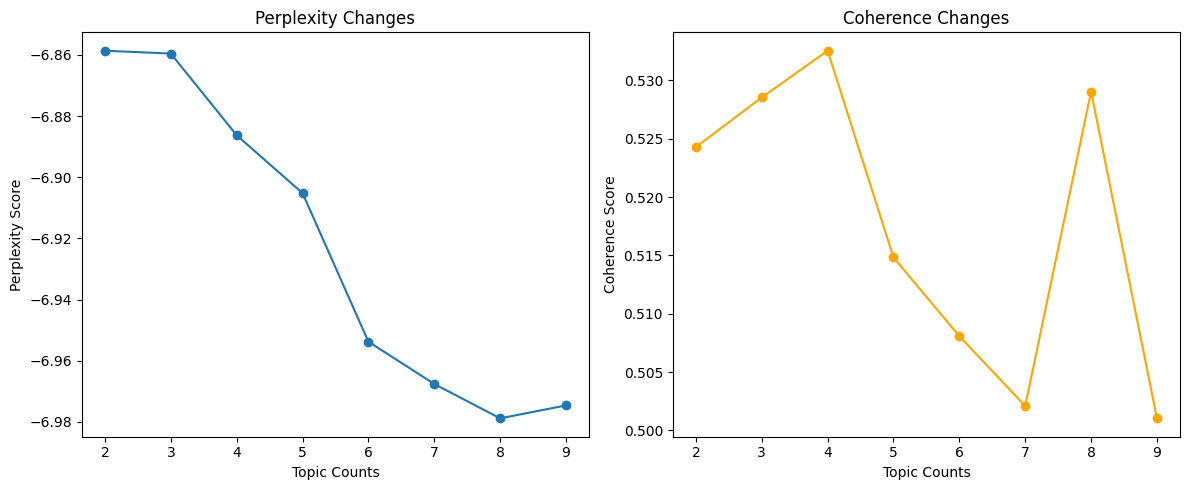

In [227]:
x = range(2,10)

fig, ax = plt.subplots(
    1,2,
    figsize=(12,5)
)

ax[0].plot(x, perplexity_values, marker = "o")
ax[0].set_xlabel("Topic Counts")
ax[0].set_ylabel("Perplexity Score")
ax[0].set_title("Perplexity Changes")

ax[1].plot(x, coherence_values, marker = "o", color = "orange")
ax[1].set_xlabel("Topic Counts")
ax[1].set_ylabel("Coherence Score")
ax[1].set_title("Coherence Changes")


plt.tight_layout()  # 서브 플롯 간의 레이아웃 간격을 자동으로 조정 (겹치지 않게 함)
plt.show()

# 차트상으로는 최적의 k수는 9ea! -> 혼란도와 일관성을 기반으로 최적의 균형점을 찾기
# ->  9ea 의 Action을 정의해볼 수 있음!
# Perplexity -> 낮을수록, 모델이 데이터셋을 잘 설명한다! (잘 이해한다!)
# Coherence -> 높을수록, 각 토픽내에서 단어들이 연관이 깊다!

# 2.3 선정한 토픽 개수를 활용해서 LDA 토픽 모델링 수행 -> Action 넘버 매칭

### Action 정의 -> LDA 토픽 모델링
1. 각 클러스터(하나의 Actor)별로 원문데이터
2. 최적의 토픽 수(K수) 설정 -> Perplexity & Coherence
3. LDA 토픽 모델링 + LDAvis
4. LDAvis 조정 -> Relevance(전체 vs 해당 단어가 특이한 정도)
5. LDA 해석 -> 토픽별 Action 정의

In [230]:
topic_num = 8   # 생성할 토픽 개수(위 동작의 결과)

# LDA 모델 초기화
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus,
    id2word= word_dict,
    random_state = 2025,

    # 사용자가 지정해야 될 파라미터
    num_topics = topic_num,
    passes= 10,
    iterations= 100
)

In [231]:
ldamodel.print_topics(num_words=10) # 각 토픽별로 가장 주요한 단어 10개를 출력

[(0,
  '0.057*"프라이팬" + 0.033*"코팅" + 0.026*"버리다" + 0.019*"벗겨지다" + 0.016*"사용" + 0.015*"없다" + 0.011*"먹다" + 0.009*"쓰다" + 0.008*"요" + 0.008*"후라이팬"'),
 (1,
  '0.166*"도마" + 0.055*"나무" + 0.035*"사용" + 0.023*"좋다" + 0.018*"방법" + 0.017*"관리" + 0.014*"추천" + 0.014*"알다" + 0.012*"플라스틱" + 0.010*"해주다"'),
 (2,
  '0.037*"칼" + 0.022*"스텐팬" + 0.021*"요리" + 0.019*"도마" + 0.015*"써다" + 0.013*"플레이" + 0.013*"팅" + 0.013*"집" + 0.012*"고기" + 0.012*"위"'),
 (3,
  '0.071*"칼" + 0.018*"좋다" + 0.018*"식칼" + 0.017*"추천" + 0.016*"요리" + 0.015*"사다" + 0.012*"쓰다" + 0.010*"갈다" + 0.010*"거" + 0.010*"뭐"'),
 (4,
  '0.023*"도마" + 0.017*"닦다" + 0.017*"쓰다" + 0.013*"물" + 0.013*"부분" + 0.012*"김치" + 0.011*"아니다" + 0.010*"자국" + 0.010*"씻다" + 0.009*"써다"'),
 (5,
  '0.110*"프라이팬" + 0.019*"팬" + 0.019*"사용" + 0.019*"인덕션" + 0.014*"코팅" + 0.014*"냄비" + 0.013*"굽다" + 0.011*"없다" + 0.011*"요" + 0.010*"보다"'),
 (6,
  '0.074*"프라이팬" + 0.036*"기름" + 0.026*"요리" + 0.023*"사용" + 0.022*"붙다" + 0.021*"방법" + 0.015*"자다" + 0.013*"불" + 0.011*"좋다" + 0.011*"요"'),
 (7,
  '0.019*"제품" + 0

```
 ldavis - ldamodel
 1 - 2
 2 - 5
 3 - 1
 4 - 0
 5 - 4
# 6 - 3


# 7 - 5
# 8 - 8
# 9 - 7
 ```

In [232]:
# 각 문서(리뷰)별로 전체 문서에 기여하는 비중을 확인하는 함수
ldamodel.get_document_topics(corpus)[3]

[(0, 0.05450298), (6, 0.8929252), (7, 0.041960612)]

- 최댓값 활용해서 각 리뷰별로 대표 토픽 번호(액션 번호)할당

In [233]:
import numpy as np


In [234]:
# 각 리뷰에서 가장 높은 확률을 가진 토픽 번호(액션번호)를 저장할 리스트
action_number_assignment = []

In [235]:
for doc_topic_distribution in ldamodel.get_document_topics(corpus):
  topic_idx = []  # 각 문서에 대한 토픽 번호들을 담아둘 리스트
  topic_prob = [] # 각 토픽의 확률값을 담아둘 리스트
  for topic_info in doc_topic_distribution:  # 각(토픽-확률)튜플 순회
    topic_idx.append(topic_info[0])
    topic_prob.append(topic_info[1])

  # 각 토픽에서 가장 높은 확률값을 가지는 토픽의 인덱스 찾기
  max_index = np.argmax(topic_prob)
  action_number_assignment.append(topic_idx[max_index])

In [236]:
import warnings
warnings.filterwarnings("ignore")

In [237]:
df_cluster0["action_cluster"] = action_number_assignment

In [238]:
df_cluster0.head()

,review,review_clean,tagged_review,vector,cluster,action_cluster
0,잘받았습니다^^ 아직사용전입니다^^ 잘사용하겠습니다^^,잘받았습니다 아직사용전입니다 잘사용하겠습니다,"[받다, 사용, 전입, 니, 자다, 용하다]","[-0.0055209068, -0.0052084085, -0.0091379145, 0.0019833804, 0.0036693327, 0.0006405299, -0.0063550533, 0.0037456723, -0.007470662, 0.0035232212, 0.0028710952, 0.0028136584, -0.007504592, -3.0470765e-05, -0.0067545543, -0.0062474175, 0.0048956526, 0.0047655944, -0.0059480844, 0.0014911002, -0.0051351325, -0.0011399186, -0.0017618722, 0.0040242556, 0.007610577, -0.005083022, -0.009887145, -0.009272659, 0.0018657774, -0.0103426855, 0.00356056, 0.003863314, -0.007848424, -0.004542566, -0.0034833718, 0.004076824, 0.002653734, -0.007384264, -0.000509818, -0.0019919921, -0.0012529291, -0.0040270793, 0.00062291557, -0.008193839, 0.0029348664, -0.0036439248, 0.00024863085, -0.0033625048, 0.0062096594, -0.0016441164, -0.0018034127, 0.0012783069, -0.0022450548, -0.0045144665, -0.0020750272, 0.009575386, -0.0018930034, 0.004233326, -0.0051184236, 0.004668421, 0.0022465847, 0.00048769813, 0.0011289055, -0.00053117675, 0.0040743584, -0.0051862895, 0.00095169846, -0.004071947, -0.007935112, -0.007226905, -0.0030270969, 0.0011061857, -0.0031075317, -0.012020998, -0.003362172, 0.0026859588, -0.007499252, -0.0069045615, -0.001717298, 0.0038987058, 0.0040540732, 0.0020860357, -0.009479418, 0.011162924, 0.0032429863, 0.0038519106, 0.0030884543, -0.0038246906, 0.011531076, -0.0021490944, -0.00059719506, 0.0025455246, -0.005636057, -0.0059211245, -0.00024410726, 0.0069025974, 0.0064652413, -0.001531696, 0.003761314, 0.0071152016, ...]",1,0
1,조리기능사 실기용 칼 추천 좀 부탁드립니당,조리기능사 실기용 칼 추천 좀 부탁드립니당,"[조리, 기능사, 실기, 용, 칼, 추천, 부탁드리다]","[-0.0011774885, 0.006426755, 0.005904674, -0.004354714, -0.0023717051, 0.0047574495, 0.0007209995, 0.0028704691, -0.0029844914, -0.003160974, 0.00499612, 0.0033042943, 0.0080899615, -0.002815445, 0.003802945, -0.0049319686, -0.0060985987, -0.004223328, -0.00494794, -0.002629063, 0.0033477494, -0.00030091542, 0.0012812281, 0.0014157733, 0.0031990542, 0.0020668826, 0.0067336517, -0.0018645251, -0.0031221875, 0.0021861817, 0.0042221555, 0.003364166, -0.004355348, -0.0018211803, -0.004455848, 0.004567955, -0.0035878955, 9.2952236e-05, 0.005048439, 0.0015775643, -0.004658026, 0.0034880138, 0.0037068576, 0.0063877585, -0.0030908345, 0.003174601, 0.0030523834, -0.0024967054, 0.00036848604, 0.0011571642, -0.005711518, -0.0074244924, 0.004946645, -0.0027125461, 0.0060168556, -0.0026286757, 0.0057023163, -0.0050343936, 0.0026071859, 0.003039146, -0.005560894, 0.005887154, -0.003497435, -0.0023635402, 0.0025160026, 0.007401989, -0.00080311747, -4.4789056e-05, 0.0029381427, 0.0013782706, -0.0070885243, -0.0060703065, 0.0021463144, 0.0068800882, -0.004520075, 0.0022574577, 0.0007658584, 0.0033596419, -0.0028701501, 0.0005921834, -0.0024529838, -0.003611117, 0.007199567, -0.009975497, -0.0008699793, 0.0017147039, -0.005791313, -0.0031690015, -0.0028691157, -0.0026134418, 0.0040575843, 0.006487601, 0.004993322, 0.001114396, -0.0056579523, -0.0009673183, -0.002574338, 0.004607888, -0.004436846, -0.0073550707, ...]",1,3
3,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,"[음식, 눌, 붙다, 프라이팬, 세척, 요, 프라이팬, 고기, 굽다, 먹다, 고기, 프라이팬, 바닥, 눌, 붙다, 떨다, 지다, 프라이팬, 코팅, 벗겨지다, 자다, 세척]","[0.0045391517, -0.00994261, 0.0013012845, 0.00811231, 0.0051621567, -0.0014306125, 0.0069632865, -0.016211135, 0.0002275387, 0.009001447, 0.0021690386, -0.007860007, 0.009087365, 0.00044765932, 0.015254463, 0.00938799, -0.002618164, -0.001652726, 0.005648012, -0.0035392186, 0.0052997624, -0.009123612, -0.0053371326, -0.010420847, -0.013749851, 0.0027954385, 0.01143201, -0.0057620206, 0.0054405583, 0.0027454465, 0.0013467532, 0.010362932, 0.00026151043, -0.008976446, 0.010571992, -0.01334982, -0.0061382814, 0.0024256834, -0.008105383, 0.015209155, -0.0024365946, -0.008723

# 3. LDA 토픽 모델링 시각화 ->LDAvis

In [239]:
! pip install pyLDAvis
# LDA 모델의 토픽 모델링 결과를 시각화 & 해석하는데 도움을 주는 도구

In [240]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [241]:
# 준비된 DLA 모델, 코퍼스, 단어사전을 기반으로 시각화 데이터들을 준비
prepared_data = gensimvis.prepare(
    ldamodel,
    corpus,
    word_dict
)

In [242]:
# LDA 결과 저장
pyLDAvis.save_html(
    prepared_data,
    f"./data/new/ldavis_to_{cluster}.html"
    )

In [243]:
# LDA 시각화
pyLDAvis.display(prepared_data)

In [244]:
ldamodel.print_topics(num_words=10) # 각 토픽별로 가장 주요한 단어 10개를 출력

[(0,
  '0.057*"프라이팬" + 0.033*"코팅" + 0.026*"버리다" + 0.019*"벗겨지다" + 0.016*"사용" + 0.015*"없다" + 0.011*"먹다" + 0.009*"쓰다" + 0.008*"요" + 0.008*"후라이팬"'),
 (1,
  '0.166*"도마" + 0.055*"나무" + 0.035*"사용" + 0.023*"좋다" + 0.018*"방법" + 0.017*"관리" + 0.014*"추천" + 0.014*"알다" + 0.012*"플라스틱" + 0.010*"해주다"'),
 (2,
  '0.037*"칼" + 0.022*"스텐팬" + 0.021*"요리" + 0.019*"도마" + 0.015*"써다" + 0.013*"플레이" + 0.013*"팅" + 0.013*"집" + 0.012*"고기" + 0.012*"위"'),
 (3,
  '0.071*"칼" + 0.018*"좋다" + 0.018*"식칼" + 0.017*"추천" + 0.016*"요리" + 0.015*"사다" + 0.012*"쓰다" + 0.010*"갈다" + 0.010*"거" + 0.010*"뭐"'),
 (4,
  '0.023*"도마" + 0.017*"닦다" + 0.017*"쓰다" + 0.013*"물" + 0.013*"부분" + 0.012*"김치" + 0.011*"아니다" + 0.010*"자국" + 0.010*"씻다" + 0.009*"써다"'),
 (5,
  '0.110*"프라이팬" + 0.019*"팬" + 0.019*"사용" + 0.019*"인덕션" + 0.014*"코팅" + 0.014*"냄비" + 0.013*"굽다" + 0.011*"없다" + 0.011*"요" + 0.010*"보다"'),
 (6,
  '0.074*"프라이팬" + 0.036*"기름" + 0.026*"요리" + 0.023*"사용" + 0.022*"붙다" + 0.021*"방법" + 0.015*"자다" + 0.013*"불" + 0.011*"좋다" + 0.011*"요"'),
 (7,
  '0.019*"제품" + 0

- LDAvis를 기준으로 action_cluster(토픽번호)를 업데이트 하여 재매핑!!
```
 ldavis - ldamodel
 1 - 1
 2 - 0
 3 - 5
 4 - 6
 5 - 4
# 6 - 7
# 7 - 3
# 8 - 2


# 9 - 1
 ```

In [245]:
new_action_topic = [] # 새로 매핑 될 토픽번호가 담길 리스트

for i in df_cluster0["action_cluster"]:
  if i == 0:
    vis_num = 2
  elif i == 1:
    vis_num = 1
  elif i == 2:
    vis_num = 8
  elif i == 3:
    vis_num = 7
  elif i == 4:
    vis_num = 5
  elif i == 5:
    vis_num = 3
  elif i == 6:
    vis_num = 4
  # elif i == 7:
  #   vis_num = 5
  else:
    vis_num = 6

  new_action_topic.append(vis_num)

In [246]:
df_cluster0["action_cluster"] = new_action_topic

In [247]:
df_cluster0.head()

,review,review_clean,tagged_review,vector,cluster,action_cluster
0,잘받았습니다^^ 아직사용전입니다^^ 잘사용하겠습니다^^,잘받았습니다 아직사용전입니다 잘사용하겠습니다,"[받다, 사용, 전입, 니, 자다, 용하다]","[-0.0055209068, -0.0052084085, -0.0091379145, 0.0019833804, 0.0036693327, 0.0006405299, -0.0063550533, 0.0037456723, -0.007470662, 0.0035232212, 0.0028710952, 0.0028136584, -0.007504592, -3.0470765e-05, -0.0067545543, -0.0062474175, 0.0048956526, 0.0047655944, -0.0059480844, 0.0014911002, -0.0051351325, -0.0011399186, -0.0017618722, 0.0040242556, 0.007610577, -0.005083022, -0.009887145, -0.009272659, 0.0018657774, -0.0103426855, 0.00356056, 0.003863314, -0.007848424, -0.004542566, -0.0034833718, 0.004076824, 0.002653734, -0.007384264, -0.000509818, -0.0019919921, -0.0012529291, -0.0040270793, 0.00062291557, -0.008193839, 0.0029348664, -0.0036439248, 0.00024863085, -0.0033625048, 0.0062096594, -0.0016441164, -0.0018034127, 0.0012783069, -0.0022450548, -0.0045144665, -0.0020750272, 0.009575386, -0.0018930034, 0.004233326, -0.0051184236, 0.004668421, 0.0022465847, 0.00048769813, 0.0011289055, -0.00053117675, 0.0040743584, -0.0051862895, 0.00095169846, -0.004071947, -0.007935112, -0.007226905, -0.0030270969, 0.0011061857, -0.0031075317, -0.012020998, -0.003362172, 0.0026859588, -0.007499252, -0.0069045615, -0.001717298, 0.0038987058, 0.0040540732, 0.0020860357, -0.009479418, 0.011162924, 0.0032429863, 0.0038519106, 0.0030884543, -0.0038246906, 0.011531076, -0.0021490944, -0.00059719506, 0.0025455246, -0.005636057, -0.0059211245, -0.00024410726, 0.0069025974, 0.0064652413, -0.001531696, 0.003761314, 0.0071152016, ...]",1,2
1,조리기능사 실기용 칼 추천 좀 부탁드립니당,조리기능사 실기용 칼 추천 좀 부탁드립니당,"[조리, 기능사, 실기, 용, 칼, 추천, 부탁드리다]","[-0.0011774885, 0.006426755, 0.005904674, -0.004354714, -0.0023717051, 0.0047574495, 0.0007209995, 0.0028704691, -0.0029844914, -0.003160974, 0.00499612, 0.0033042943, 0.0080899615, -0.002815445, 0.003802945, -0.0049319686, -0.0060985987, -0.004223328, -0.00494794, -0.002629063, 0.0033477494, -0.00030091542, 0.0012812281, 0.0014157733, 0.0031990542, 0.0020668826, 0.0067336517, -0.0018645251, -0.0031221875, 0.0021861817, 0.0042221555, 0.003364166, -0.004355348, -0.0018211803, -0.004455848, 0.004567955, -0.0035878955, 9.2952236e-05, 0.005048439, 0.0015775643, -0.004658026, 0.0034880138, 0.0037068576, 0.0063877585, -0.0030908345, 0.003174601, 0.0030523834, -0.0024967054, 0.00036848604, 0.0011571642, -0.005711518, -0.0074244924, 0.004946645, -0.0027125461, 0.0060168556, -0.0026286757, 0.0057023163, -0.0050343936, 0.0026071859, 0.003039146, -0.005560894, 0.005887154, -0.003497435, -0.0023635402, 0.0025160026, 0.007401989, -0.00080311747, -4.4789056e-05, 0.0029381427, 0.0013782706, -0.0070885243, -0.0060703065, 0.0021463144, 0.0068800882, -0.004520075, 0.0022574577, 0.0007658584, 0.0033596419, -0.0028701501, 0.0005921834, -0.0024529838, -0.003611117, 0.007199567, -0.009975497, -0.0008699793, 0.0017147039, -0.005791313, -0.0031690015, -0.0028691157, -0.0026134418, 0.0040575843, 0.006487601, 0.004993322, 0.001114396, -0.0056579523, -0.0009673183, -0.002574338, 0.004607888, -0.004436846, -0.0073550707, ...]",1,7
3,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,음식 눌어붙은 프라이팬은 어떻게 세척해야 할까요? 프라이팬에 고기를 구워먹었는데 고기가 타면서 프라이팬 바닥에 눌어붙어 안떨어 지는데 어떻게 하면 프라이팬 코팅 안벗겨지고 잘 세척할수 있을까요?,"[음식, 눌, 붙다, 프라이팬, 세척, 요, 프라이팬, 고기, 굽다, 먹다, 고기, 프라이팬, 바닥, 눌, 붙다, 떨다, 지다, 프라이팬, 코팅, 벗겨지다, 자다, 세척]","[0.0045391517, -0.00994261, 0.0013012845, 0.00811231, 0.0051621567, -0.0014306125, 0.0069632865, -0.016211135, 0.0002275387, 0.009001447, 0.0021690386, -0.007860007, 0.009087365, 0.00044765932, 0.015254463, 0.00938799, -0.002618164, -0.001652726, 0.005648012, -0.0035392186, 0.0052997624, -0.009123612, -0.0053371326, -0.010420847, -0.013749851, 0.0027954385, 0.01143201, -0.0057620206, 0.0054405583, 0.0027454465, 0.0013467532, 0.010362932, 0.00026151043, -0.008976446, 0.010571992, -0.01334982, -0.0061382814, 0.0024256834, -0.008105383, 0.015209155, -0.0024365946, -0.008723

- 저장

In [248]:
with open(f"./data/cluster_df_{cluster}_action.pkl","wb") as f:
  pickle.dump(df_cluster0, f)
#

In [249]:
df_cluster0["action_cluster"].value_counts()

,count
action_cluster,
1,618
2,573
3,466
6,373
4,313
5,295
7,263
8,165
